In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [297]:
# setting style
sns.set_style("darkgrid")
# setting context
sns.set_context("paper")
# setting palette
sns.set_palette("deep", color_codes=True)


    PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
    HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
    CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    Destination - The planet the passenger will be debarking to.
    Age - The age of the passenger.
    VIP - Whether the passenger has paid for special VIP service during the voyage.
    RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    Name - The first and last names of the passenger.
    Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [298]:
data = pd.read_csv(
    r"Data\train.csv")

In [299]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [300]:
data.shape

(8693, 14)

In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [302]:
data.describe(include="all")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [303]:
data.describe(include="object").round().T

,count,unique,top,freq
PassengerId,8693,8693,0001_01,1
HomePlanet,8492,3,Earth,4602
CryoSleep,8476,2,False,5439
Cabin,8494,6560,G/734/S,8
Destination,8511,3,TRAPPIST-1e,5915
VIP,8490,2,False,8291
Name,8493,8473,Gollux Reedall,2


In [304]:
data.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,29.0,14.0,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,225.0,667.0,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.0,1611.0,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,174.0,605.0,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.0,1137.0,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,305.0,1146.0,0.0,0.0,0.0,46.0,24133.0


In [305]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [306]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<Axes: >

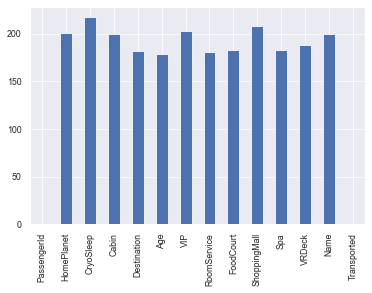

In [307]:
data.isnull().sum().plot(kind="bar")

In [308]:
np.round(data.isnull().sum() / data.shape[0], 2)

PassengerId     0.00
HomePlanet      0.02
CryoSleep       0.02
Cabin           0.02
Destination     0.02
Age             0.02
VIP             0.02
RoomService     0.02
FoodCourt       0.02
ShoppingMall    0.02
Spa             0.02
VRDeck          0.02
Name            0.02
Transported     0.00
dtype: float64

<Axes: >

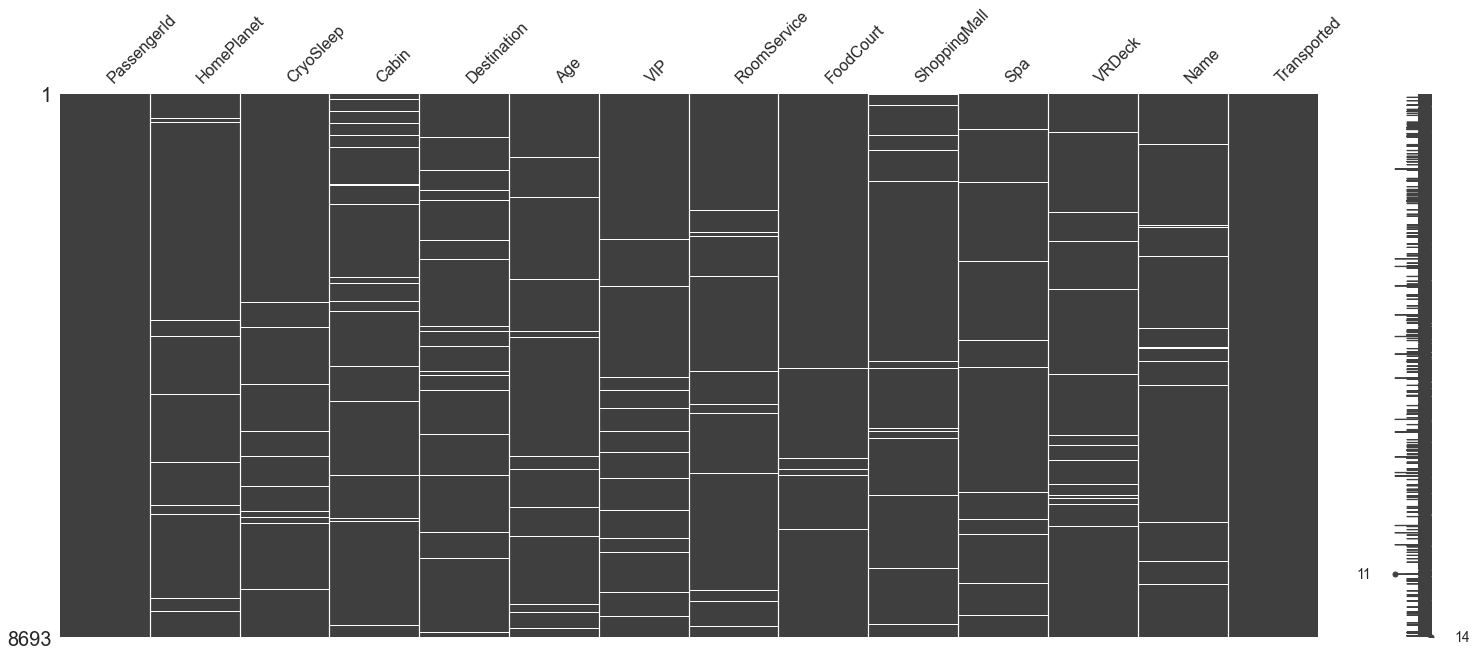

In [309]:
msno.matrix(data)

<Axes: >

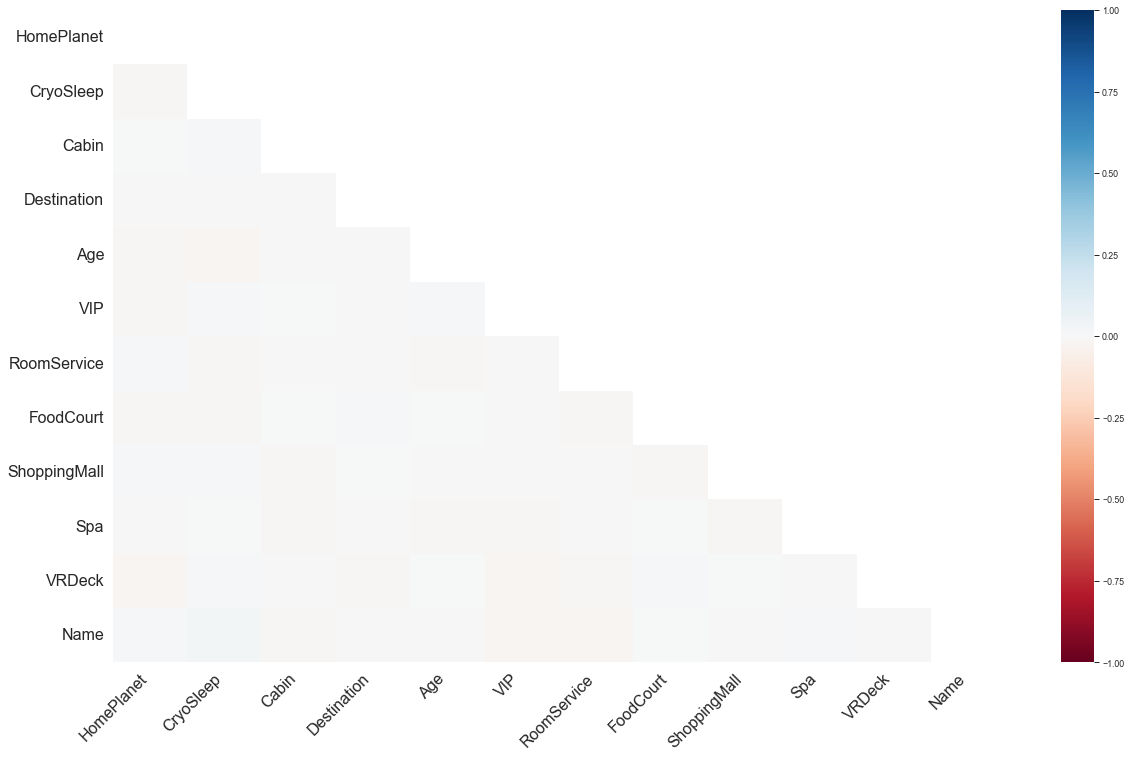

In [310]:
msno.heatmap(data)

In [311]:
data.duplicated().sum()

0

In [312]:
data["GroupID"] = data["PassengerId"].apply(
    lambda grp_id: grp_id.split("_")[0])

In [313]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004


In [314]:
data["GroupID"].unique()

array(['0001', '0002', '0003', ..., '9278', '9279', '9280'], dtype=object)

In [315]:
data["GroupID"].nunique()

6217

In [316]:
data["GroupID"].value_counts()

4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: GroupID, Length: 6217, dtype: int64

In [317]:
data["GroupSizes"] = data["GroupID"].map(
    lambda size: data["GroupID"].value_counts()[size])

In [318]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,GroupSizes
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1


In [319]:
data[data["GroupID"] == "9081"]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,GroupSizes
8507,9081_01,Earth,False,G/1476/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,Hanna Clemondsey,False,9081,8
8508,9081_02,Earth,False,F/1858/P,55 Cancri e,15.0,False,0.0,0.0,0.0,208.0,754.0,Willah Clemondsey,False,9081,8
8509,9081_03,Earth,True,NaN,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Beula Clemondsey,False,9081,8
8510,9081_04,Earth,False,G/1476/P,TRAPPIST-1e,9.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,9081,8
8511,9081_05,Earth,False,F/1858/P,TRAPPIST-1e,48.0,False,0.0,586.0,784.0,4.0,21.0,Haryn Clemondsey,True,9081,8
8512,9081_06,Earth,False,F/1858/P,PSO J318.5-22,16.0,NaN,0.0,0.0,761.0,0.0,0.0,Daryla Clemondsey,False,9081,8
8513,9081_07,Earth,True,G/1476/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Aliey Clemondsey,True,9081,8
8514,9081_08,Earth,True,G/1476/P,PSO J318.5-22,3.0,False,0.0,0.0,0.0,0.0,0.0,Virgie Clemondsey,True,9081,8


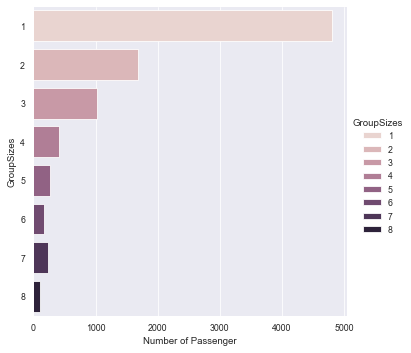

In [320]:
sns.catplot(data, y="GroupSizes", kind="count",
            hue="GroupSizes", legend="full")
plt.xlabel("Number of Passenger")
plt.show()

In [321]:
# data["CabinDeck"] = data["Cabin"].apply(
#     lambda x: x.str.split("/")[0]).astype(str)

In [322]:
data["Cabin"].str.replace("/", "")

0          B0P
1          F0S
2          A0S
3          A0S
4          F1S
         ...  
8688      A98P
8689    G1499S
8690    G1500S
8691     E608S
8692     E608S
Name: Cabin, Length: 8693, dtype: object

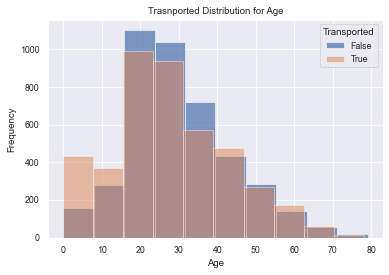

In [323]:
data[data["Transported"] == False]["Age"].plot(
    kind="hist", alpha=0.7, label="False")
data[data["Transported"] == True]["Age"].plot(
    kind="hist", alpha=0.5, label="True")
plt.legend(title="Transported")
plt.xlabel("Age")
plt.title("Trasnported Distribution for Age")
plt.show()

In [324]:
data["Transported"].value_counts(normalize=True)

True     0.503624
False    0.496376
Name: Transported, dtype: float64

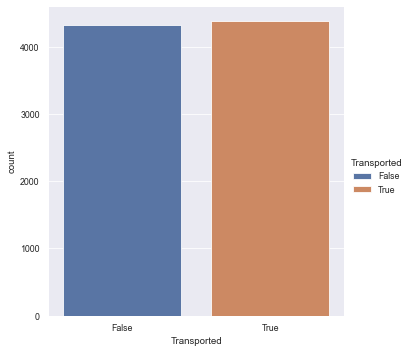

In [325]:
sns.catplot(data=data, x="Transported", kind="count", hue="Transported")

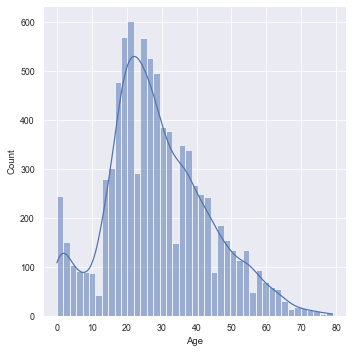

In [326]:
sns.displot(data=data, x="Age", kind="hist", kde=True)

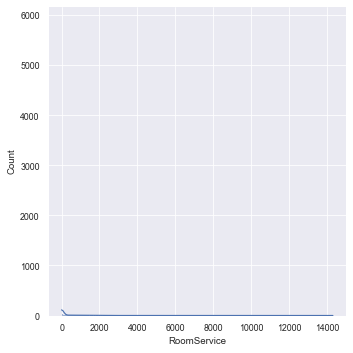

In [327]:
sns.displot(data=data, x="RoomService", kind="hist", kde=True)

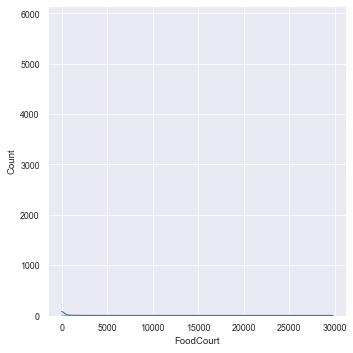

In [328]:
sns.displot(data=data, x="FoodCourt", kind="hist", kde=True)

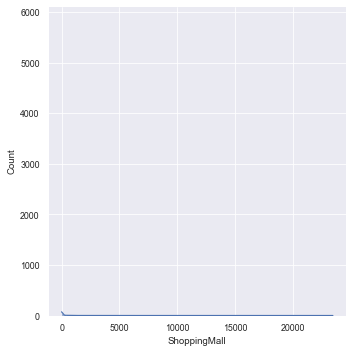

In [329]:
sns.displot(data=data, x="ShoppingMall", kind="hist", kde=True)

FEATURE ENGINEERING

In [330]:
import math


def impute_and_feature_eng(data, fill_method, test=False):
    """
    This functions takes in a DF and fill method. 
    """
    if test:
        data["GroupID"] = data["PassengerId"].apply(lambda grp_id: grp_id.split("_")[0])
        data["GroupSizes"] = data["GroupID"].map(lambda size: data["GroupID"].value_counts()[size])
    
    data['TotalExpenditure'] = data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
    
    data.loc[:, 'Age'] = data.loc[:, 'Age'].fillna(value=int(data['Age'].median()))
    
    data.loc[:, 'Cabin'] = data.loc[:, 'Cabin'].fillna(value="Missing/Missing/Missing")
    
    data.loc[data['TotalExpenditure'] == 0, 'CryoSleep'] = data.loc[data['TotalExpenditure'] == 0]['CryoSleep'].fillna(value=False)
    data.loc[data['TotalExpenditure'] != 0, 'CryoSleep'] = data.loc[data['TotalExpenditure'] != 0]['CryoSleep'].fillna(value=True)
    
    # grp_ids = data['GroupID'].unique()
    # for grp in grp_ids:
    #     # print(data[data['GroupID']==grp])
    #     # data_imputed = pd.concat([data_imputed,data[data['GroupID']==grp].fillna(method='bfill')])
    #     data.loc[data["GroupID"]==grp] = data.loc[data["GroupID"]==grp].fillna(method="bfill")

    data= data.fillna(method=fill_method)
    
    print(data.isna().sum())
    
    data[['Deck', 'Floor', 'Side']] = data['Cabin'].str.split('/', expand=True)
    data = data.drop(columns=['Cabin'],axis=1)

    return data
    
    
      
imputed_data = impute_and_feature_eng(data,'bfill')



PassengerId         0
HomePlanet          0
CryoSleep           0
Cabin               0
Destination         0
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Name                0
Transported         0
GroupID             0
GroupSizes          0
TotalExpenditure    0
dtype: int64


In [331]:
imputed_data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,GroupSizes,TotalExpenditure,Deck,Floor,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,0.0,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,736.0,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,10383.0,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,5176.0,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,1091.0,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,1,8536.0,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,1,0.0,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,1,1873.0,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,2,4637.0,E,608,S


In [332]:
test_data = pd.read_csv("Data/test.csv")

imputed_test_data = impute_and_feature_eng(test_data,'bfill', test=True)
imputed_test_data

PassengerId         0
HomePlanet          0
CryoSleep           0
Cabin               0
Destination         0
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Name                0
GroupID             0
GroupSizes          0
TotalExpenditure    0
dtype: int64


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupID,GroupSizes,TotalExpenditure,Deck,Floor,Side
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,1,0.0,G,3,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,1,2832.0,F,4,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,1,0.0,C,0,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021,1,7418.0,C,1,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023,1,645.0,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,9266,2,0.0,G,1496,S
4273,9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,9269,1,1018.0,Missing,Missing,Missing
4274,9271_01,Mars,True,55 Cancri e,26.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,9271,1,0.0,D,296,P
4275,9273_01,Europa,False,PSO J318.5-22,26.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,9273,1,3203.0,D,297,P


In [333]:
data[(data['TotalExpenditure'] == 0) & (data['CryoSleep'] == False) ][['CryoSleep','Age', "Cabin"]]


,CryoSleep,Age,Cabin
0,False,39.0,B/0/P
19,False,0.0,G/0/P
24,False,10.0,E/0/S
26,False,7.0,E/0/S
34,False,2.0,F/9/P
...,...,...,...
8651,False,8.0,G/1498/P
8654,False,0.0,F/1888/P
8655,False,22.0,E/592/P
8664,False,32.0,G/1490/S


In [334]:
len(data[(data['TotalExpenditure'] == 0) & (data['CryoSleep'] == False) ][['CryoSleep','Age']])

616

In [335]:
#We will now move Deck, Floor, and Side to be before all the numerical features in the data
numeric_features = imputed_data.select_dtypes(include=['int64', 'float64']).columns
new_cols_order = ['HomePlanet','CryoSleep','Destination', 'VIP', 'Deck', 'Floor', 'Side'] + numeric_features.tolist() + ['Transported']
imputed_data = data.reindex(columns=new_cols_order)
imputed_data.head()

,HomePlanet,CryoSleep,Destination,VIP,Deck,Floor,Side,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupSizes,TotalExpenditure,Transported
0,Europa,False,TRAPPIST-1e,False,NaN,NaN,NaN,39.0,0.0,0.0,0.0,0.0,0.0,1,0.0,False
1,Earth,False,TRAPPIST-1e,False,NaN,NaN,NaN,24.0,109.0,9.0,25.0,549.0,44.0,1,736.0,True
2,Europa,False,TRAPPIST-1e,True,NaN,NaN,NaN,58.0,43.0,3576.0,0.0,6715.0,49.0,2,10383.0,False
3,Europa,False,TRAPPIST-1e,False,NaN,NaN,NaN,33.0,0.0,1283.0,371.0,3329.0,193.0,2,5176.0,False
4,Earth,False,TRAPPIST-1e,False,NaN,NaN,NaN,16.0,303.0,70.0,151.0,565.0,2.0,1,1091.0,True


In [336]:
#Change columns to correct dtype
for colName in imputed_data.columns:
    if colName in numeric_features:
        next
    else:
        imputed_data[colName] = imputed_data[colName].astype('category')

imputed_data.dtypes

HomePlanet          category
CryoSleep           category
Destination         category
VIP                 category
Deck                category
Floor               category
Side                category
Age                  float64
RoomService          float64
FoodCourt            float64
ShoppingMall         float64
Spa                  float64
VRDeck               float64
GroupSizes             int64
TotalExpenditure     float64
Transported         category
dtype: object

In [337]:
# print(f"Minimum age is: {min(imputed_data.Age)}")

In [338]:
# constant = 1
# imputed_data['Age_Log'] = np.log(imputed_data['Age'] + constant)
# from scipy import stats
# imputed_data['Age_BoxCox'],BoxCox_lambda_val = stats.boxcox(imputed_data['Age'] + constant)

In [339]:
# import matplotlib.pyplot as plt
# fig, axs = plt.subplots(1, 2, figsize=(12, 4))
# #Plotting histogram of Age after Log transformation
# sns.histplot(data=imputed_data, x='Age_Log', bins=30,ax=axs[0], hue='Transported', multiple='stack')
# axs[0].set_title('After Transformation')
# axs[0].set_xlabel('Log(Age + small constant)')
# axs[0].set_ylabel('Count')

# #Plotting histogram of Age after Box-Cox transformation
# sns.histplot(data=imputed_data, x='Age_BoxCox', bins=30,ax=axs[1], hue='Transported', multiple='stack')
# axs[1].set_title('After Transformation')
# axs[1].set_xlabel('BoxCox(Age + small constant)')
# axs[1].set_ylabel('Count')
# plt.tight_layout()
# plt.show()

In [340]:
# imputed_data['Age']=imputed_data['Age_BoxCox']
# imputed_data.drop(columns=(['Age_Log','Age_BoxCox']),inplace=True)
# imputed_data.head()

In [341]:
#Let's see how many unique values each column has
for i in imputed_data.columns:
  print(f'The column "{i}" has {len(imputed_data[i].value_counts())} unique values.')

The column "HomePlanet" has 3 unique values.
The column "CryoSleep" has 2 unique values.
The column "Destination" has 3 unique values.
The column "VIP" has 2 unique values.
The column "Deck" has 0 unique values.
The column "Floor" has 0 unique values.
The column "Side" has 0 unique values.
The column "Age" has 80 unique values.
The column "RoomService" has 1273 unique values.
The column "FoodCourt" has 1507 unique values.
The column "ShoppingMall" has 1115 unique values.
The column "Spa" has 1327 unique values.
The column "VRDeck" has 1306 unique values.
The column "GroupSizes" has 8 unique values.
The column "TotalExpenditure" has 2336 unique values.
The column "Transported" has 2 unique values.


In [342]:
imputed_data['Transported'] = imputed_data['Transported'].astype(int)

In [343]:
#Let's see the distribution of our Transported column
print(f"Distribution of Transported column: {imputed_data['Transported'].sum()/imputed_data.shape[0]*100:.2f}%")

Distribution of Transported column: 50.36%


In [344]:
#We need to standardize the features: Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, and TotalExpenditure
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

imputed_data[numeric_features] = sc.fit_transform(imputed_data[numeric_features])
imputed_test_data[numeric_features] = sc.fit_transform(imputed_test_data[numeric_features])
imputed_data.head()

,HomePlanet,CryoSleep,Destination,VIP,Deck,Floor,Side,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupSizes,TotalExpenditure,Transported
0,Europa,False,TRAPPIST-1e,False,NaN,NaN,NaN,0.711945,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,-0.648735,-0.514066,0
1,Earth,False,TRAPPIST-1e,False,NaN,NaN,NaN,-0.334037,-0.173528,-0.278689,-0.245971,0.209267,-0.227692,-0.648735,-0.251479,1
2,Europa,False,TRAPPIST-1e,True,NaN,NaN,NaN,2.036857,-0.272527,1.934922,-0.287317,5.634034,-0.223327,-0.022268,3.190333,0
3,Europa,False,TRAPPIST-1e,False,NaN,NaN,NaN,0.293552,-0.337025,0.511931,0.326250,2.655075,-0.097634,-0.022268,1.332604,0
4,Earth,False,TRAPPIST-1e,False,NaN,NaN,NaN,-0.891895,0.117466,-0.240833,-0.037590,0.223344,-0.264352,-0.648735,-0.124824,1


In [345]:
# We now need to encode our categorical features: HomePlanet, CryoSleep, Destination, VIP, Deck, Floor, and Side.

categoricalFeatures = imputed_data.select_dtypes(include='category').columns
#For certain models we require drop_first=True so that we avoid the dummy variable trap
#For other models we can have drop_first=False
train_data_prep = pd.get_dummies(data=imputed_data,columns=categoricalFeatures, drop_first=True, dtype='int')
test_data_prep = pd.get_dummies(data=imputed_test_data,columns=categoricalFeatures, drop_first=True, dtype='int')
# data_nondropfirst = pd.get_dummies(data=data,columns=categoricalFeatures, drop_first=False, dtype='int')

train_data_prep.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupSizes,TotalExpenditure,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,0.711945,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,-0.648735,-0.514066,0,1,0,0,0,1,0
1,-0.334037,-0.173528,-0.278689,-0.245971,0.209267,-0.227692,-0.648735,-0.251479,1,0,0,0,0,1,0
2,2.036857,-0.272527,1.934922,-0.287317,5.634034,-0.223327,-0.022268,3.190333,0,1,0,0,0,1,1
3,0.293552,-0.337025,0.511931,0.326250,2.655075,-0.097634,-0.022268,1.332604,0,1,0,0,0,1,0
4,-0.891895,0.117466,-0.240833,-0.037590,0.223344,-0.264352,-0.648735,-0.124824,1,0,0,0,0,1,0


In [346]:
#Let's move the Transported column back to the end
transportedColumn = train_data_prep.pop('Transported')
train_data_prep = pd.concat([train_data_prep,transportedColumn],axis=1)

# transportedColumn_test = test_data_prep.pop('Transported')
# test_data_prep = pd.concat([test_data_prep,transportedColumn],axis=1)
# transportedColumn = data_nondropfirst.pop('Transported')
# data_nondropfirst = pd.concat([data_nondropfirst,transportedColumn],axis=1)

In [349]:
#Let's create our X (independant variables) and y (dependant variable)
X_train = train_data_prep.iloc[:,0:-1].values
y_train = train_data_prep.iloc[:,-1].values

train_columns = train_data_prep.iloc[:,0:-1].columns

X_test = test_data_prep.iloc[:,0:-1].values
# y_test = test_data_prep.iloc[:,-1].values
# X_nondropfirst = data_nondropfirst.iloc[:,0:-1].values
# y_nondropfirst = data_nondropfirst.iloc[:,-1].values

In [350]:
from sklearn.model_selection import train_test_split
#Splitting the dataset into the Training set and Test set for drop_first=True
#Splitting dataset into the Training set (60%), Cross-Validation set (20%), and Test set (20%)
#1. for drop_first=True
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.4, random_state = 0)


# # X_test_dropfirst, X_test_cv_dropfirst, y_test_dropfirst, y_test_cv_dropfirst = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 0)
# #2. for drop_first=False
# X_train_nondropfirst, X_temp, y_train_nondropfirst, y_temp = train_test_split(X_nondropfirst, y_nondropfirst, test_size = 0.4, random_state = 0)
# X_test_nondropfirst, X_test_cv_nondropfirst, y_test_nondropfirst, y_test_cv_nondropfirst = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 0)

MODEL TARAINING

In [351]:
#Import libraries
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,make_scorer
#Define F1 score as the scoring metric
f1_scorer = make_scorer(f1_score)
# import optuna
# import warnings

# from sklearn.linear_model import LogisticRegression


In [352]:
from xgboost import XGBClassifier

#Build optimal Decision Tree XGBoost Model
xgbFinal = XGBClassifier(colsample_bylevel= 0.5, colsample_bynode= 1, colsample_bytree= 0.75, learning_rate= 0.5, max_depth= 8, min_split_loss= 0, reg_alpha= 10, reg_lambda= 50, subsample= 1)
xgbFinal.fit(X_train,y_train);
# y_pred_cv = xgbFinal.predict(X_test)

In [353]:
# #Displaying model's performance on Train and Validation set
# print("Decision Tree (XGBoost) Model's performance on Train, and Validation set:")
# print("The model's accuracy on the training set is: " + str(xgbFinal.score(X_train_nondropfirst,y_train_nondropfirst)*100)+ "%")
# print("The model's accuracy on the validation set is: " + str(accuracy_score(y_test_cv_nondropfirst,y_pred_cv)*100)+ "%")
# print("The model's precision on the validation set is: " + str(precision_score(y_test_cv_nondropfirst,y_pred_cv)*100)+ "%")
# print("The model's recall on the validation set is: " + str(recall_score(y_test_cv_nondropfirst,y_pred_cv)*100)+ "%")
# print("The model's f1_score on the validation set is: " + str(f1_score(y_test_cv_nondropfirst,y_pred_cv)))

In [354]:
y_pred_test = xgbFinal.predict(X_val)
print("Decision Tree (XGBoost) performance on Validation set:")
print("The model's accuracy on the test set is: " + str(accuracy_score(y_val,y_pred_test)*100)+ "%")

Decision Tree (XGBoost) performance on Validation set:
The model's accuracy on the test set is: 78.80966072455435%


In [355]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(iterations=1500, eval_metric='Accuracy', verbose=0)
cat_model.fit(X_train, y_train)

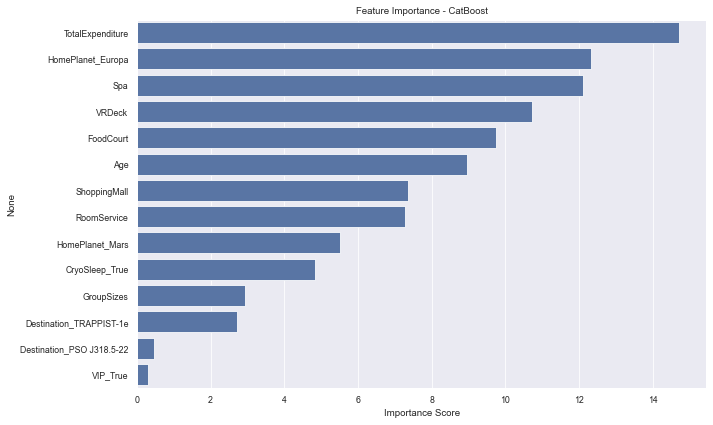

In [356]:
importances = pd.Series(cat_model.feature_importances_, index=train_columns)
importances = importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance - CatBoost")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()